# Cluster Analysis

This notebook focuses on analysing the word clusters for a model. This includes visualizing fit of the clusters, formating them for manual inspection, and visualizing them using Multi Dimensional Scaling (MDS).

We first import the libaries we will need throughout the project

In [1]:
#Import graphing utilities
%matplotlib inline
import matplotlib.pyplot as plt

# Import useful mathematical libraries
import numpy as np
import pandas as pd

# Import useful Machine learning libraries
import gensim

# Import utility files
from utils import save_object,load_object, make_clustering_objects, make_frequency_dictionary

#### Setup directories

If this is the first time doing this analysis, 
we first will set up all the directories we need
to save and load the models we will be using

In [2]:
import os
directories = ['cluster-analysis','dictionaries']
for dirname in directories:
    if not os.path.exists(dirname):
        os.makedirs(dirname)

### Set model name

Before begining the rest of this project, we select a name for our model. This name will be used to save and load the files for this model

In [3]:
# Set the model we are going to be analyzing
model_name = "BipolarReddit"

### Measure fit

Now that we have initialized all we need for our analysis, we can procceed to examine the fit of each clustering.

In [4]:
# Load the fit and test point values
fit = load_object('objects/', model_name + "-words" + "-fit")
test_points = load_object('objects/', model_name + "-words" + "-test_points")

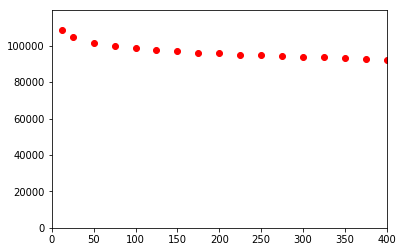

In [5]:
# Plot the fit for each size
plt.plot(test_points, fit, 'ro')
plt.axis([0, 400, 0, np.ceil(fit[0] + (1/10)*fit[0])])
plt.show()

### Format for inspection

After measuring the fit of each clustering, we can decide the number of clusters to use, and further focus on this clustering. To better examine this clustering, we convert the clustering into an readable csv here.

In [6]:
# Set the number of clusters to analyze
num_clusters = 100 

In [7]:
# load the models
model = gensim.models.Word2Vec.load('models/' + model_name + '.model')
kmeans = load_object('clusters/', model_name + "-words-cluster_model-" + str(num_clusters))
WordsByFeatures = load_object('matricies/', model_name + '-' + 'WordsByFeatures')

/Users/Alex/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
vocab_list = sorted(list(model.wv.vocab))

In [10]:
#BipR_WordFreq = {}
#for i in range(len(vocab_list)):
#    word = vocab_list[i]
#    freq = model.wv.vocab[word].count
#BipR_WordFreq.update({word:freq})
BipR_WordFreq = make_frequency_dictionary(model)
#save_object(BipR_WordFreq,'dictionaries/','BipR_WordFreq')
print(BipR_WordFreq)

{'aa': 60, 'aaand': 10, 'aap': 13, 'aaps': 16, 'abandon': 48, 'abandoned': 101, 'abandoning': 22, 'abandonment': 19, 'abc': 16, 'abilify': 843, 'abilify_mg': 57, 'abilify_wellbutrin': 14, 'abilities': 48, 'ability': 388, 'ability_function': 15, 'able': 2782, 'able_afford': 26, 'able_catch': 11, 'able_concentrate': 13, 'able_finish': 12, 'able_focus': 43, 'able_function': 39, 'able_get_bed': 16, 'able_handle': 48, 'able_hold': 23, 'able_hold_job': 16, 'able_identify': 12, 'able_maintain': 23, 'able_manage': 24, 'able_recognize': 13, 'able_relate': 19, 'abnormal': 81, 'abnormally': 15, 'abortion': 11, 'abroad': 57, 'abrupt': 14, 'abruptly': 37, 'absence': 64, 'absences': 35, 'absent': 38, 'absolute': 137, 'absolute_best': 10, 'absolute_hell': 11, 'absolute_worst': 23, 'absolutely': 612, 'absolutely_horrible': 15, 'absolutely_miserable': 13, 'absolutely_nothing': 60, 'absolutely_terrible': 16, 'absolutely_terrified': 11, 'absorb': 18, 'absorbing': 13, 'absorption': 11, 'abstain': 18, 'abs

In [52]:
BipSOs = load_object('dictionaries/','BipSOs_WordFreq')
BipA = load_object('dictionaries/','BipAnalysis_WordFreq')
BipR = load_object('dictionaries/','BipR_WordFreq')

In [53]:
print(BipA['abandon'])
print(BipSOs['abandon'])
print(BipR['abandon'])

64
18
48


In [26]:
clusters = make_clustering_objects(model, kmeans, vocab_list, WordsByFeatures)

ValueError: Incorrect number of features. Got 300 features, expected 4

In [9]:
# Sort all the words in the words list
for cluster in clusters:
    cluster["word_list"].sort(key = lambda x:x[1], reverse = True)

NameError: name 'clusters' is not defined

In [13]:
# Set the number of words to display. The table with contain the top size_words_list words
size_words_list = 100
table = []
for i in range(len(clusters)):
    row = []
    row.append("cluster " + str(i+1))
    row.append(clusters[i]["total_freq"])
    row.append(clusters[i]["unique_words"])
    for j in range(size_words_list):
        try:
            row.append(clusters[i]["word_list"][j])
        except:
            break
    table.append(row)

In [19]:
import csv
with open('cluster-analysis/' + model_name + "-" + str(num_clusters) + '.csv', 'w') as csvfile:
    labels = ["Cluster Num", "total_freq", "unique_words"]
    for i in range(size_words_list):
        labels.append("Word" + str(i+1))
    labels.append("word_list")
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    [writer.writerow(r) for r in table]


#### Display Clusters Using MDS

Produce a visualization of our clusters in a low dimensional space

In [23]:
# Fit the model to the clusters
from sklearn.manifold import MDS
mds = MDS().fit(kmeans.cluster_centers_)
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [22]:
# Get the embeddings
embedding = mds.embedding_.tolist()
x = list(map(lambda x:x[0], embedding))
y = list(map(lambda x:x[1], embedding))

[0.735110588304785, 0.10532992070867053, 0.8022936274200625, -0.3783479540653951, -0.2592946785843378, 0.20783840846576573, -1.589196059639761, -0.5303199748997505, -0.19053305935216316, 0.2310783720513166, 3.1336095683608693, -0.340041879074233, 1.5362921805548473, 0.41656334151107904, -0.1439713719435903, -0.23858061625890636, -0.34425384063647246, -1.6247015678135532, 1.733434498780246, -2.8883739851835015, -0.5170651088229267, -0.5826492684451849, -0.4157209288817228, -0.04995403791867879, -0.797035609875094, -0.2035192263760224, -0.34312192072603004, -0.25993489883825033, 3.2732793172118737, 0.04955971938114049, 0.040652348560166, 1.3441007582318922, 1.599114553399274, 0.3103750782019815, 1.2960527678415679, -0.2725404383597468, -1.0171303059146113, -0.7546907863703811, -1.4480326852651633, 0.5736565040483671, 1.4412695205507962, 0.9456584306932055, 0.6797858348804903, 1.1478592232196005, -0.6589930606699319, -0.9234769739292961, -1.1756809314944543, 1.1957244337393294, 1.56366028

In [17]:
top_words= list(map(lambda x: x[0][0], map(lambda x: x["word_list"], clusters)))

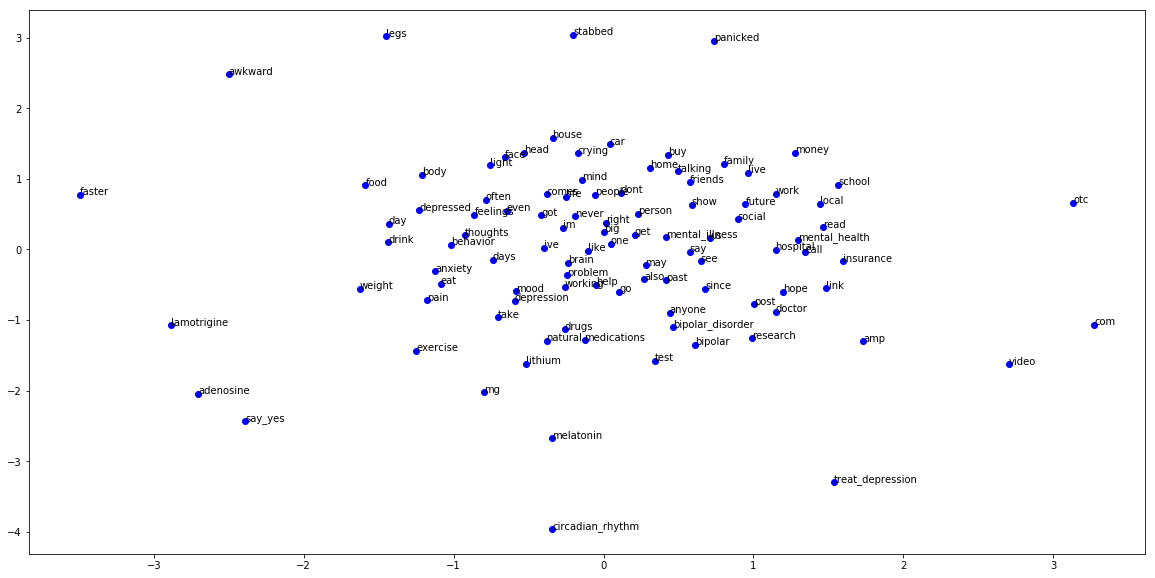

In [18]:
# Plot the Graph with top words
plt.figure(figsize = (20, 10))
plt.plot(x, y, 'bo')
for i in range(len(top_words)):
    plt.annotate(top_words[i], (x[i], y[i]))
plt.show()

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pylab as pl
iris = load_iris()
pca = PCA(n_components=2).fit(clusters[])
pca_2d = pca.transform(iris.data)
pl.figure('Reference Plot')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=iris.target)
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(iris.data)
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()

SyntaxError: invalid syntax (<ipython-input-24-72ecf095f5b1>, line 6)